In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import pandas as pd

# Create a Spark session
spark = SparkSession.builder.appName("Visualize Data").getOrCreate()


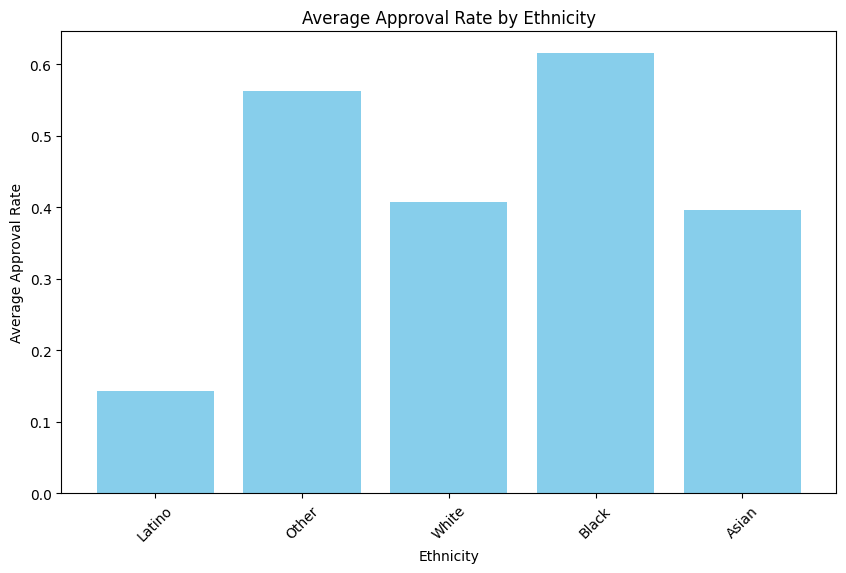

In [0]:
def plot_average_approval_rate_by_category(df, category, plot_color='skyblue', plot_title=''):
    """
    Function to calculate and plot average approval rates by a specified category.

    :param df: Spark DataFrame containing the data.
    :param category: String, the column name to group by (e.g., 'Ethnicity').
    :param plot_color: Color of the bars in the plot.
    :param plot_title: Title of the plot.
    """

    # Calculate average approval rates by the specified category
    df_grouped = df.groupBy(category).agg(avg("Approved").alias("AverageApprovalRate"))

    # Convert to Pandas DataFrame for plotting
    pandas_df = df_grouped.toPandas()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(pandas_df[category], pandas_df['AverageApprovalRate'], color=plot_color)
    plt.xlabel(category)
    plt.ylabel('Average Approval Rate')
    plt.title(plot_title if plot_title else f'Average Approval Rate by {category}')
    plt.xticks(rotation=45)
    plt.show()

# Create a Spark session
spark = SparkSession.builder.appName("Analysis").getOrCreate()

df = spark.sql("""
                        SELECT *
                        FROM male_only
                        """)
plot_average_approval_rate_by_category(df, 'Ethnicity', plot_color='skyblue', plot_title='Average Approval Rate by Ethnicity')


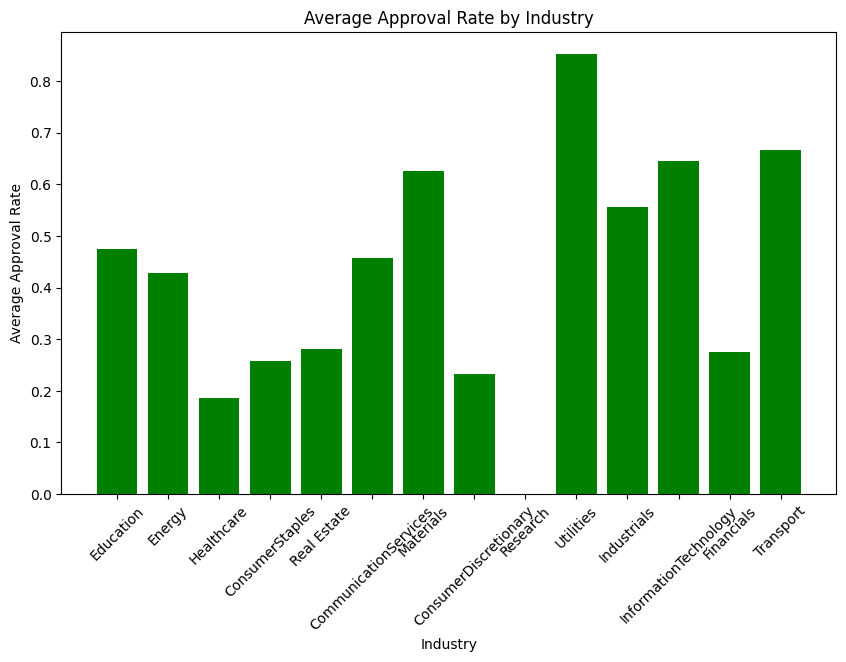

In [0]:
plot_average_approval_rate_by_category(df, 'Industry', plot_color='green', plot_title='Average Approval Rate by Industry')